In [ ]:
 import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('/content/gstr rt compiled final(Sheet1).csv')
df.head()

,packet_id,item_id,sku_id,core_item_id,Qty,item_status,order_status,is_shipped,is_realised,is_delivered,...,Seller_GSTIN,Shipping_case,Tax_Seller_GSTIN,base_amount,tds_rate,tcs_amount,tds_amount,cgst_tcs_amount,sgst_tcs_amount,igst_tcs_amount
0,7950095119,9950074011,75347318,NaN,1,C,C,1,1,1,...,07AAMPM7556K1Z1,Interstate,07AAMPM7556K1Z1,919.04,0.01,9.19,9.19,0.000,0.000,9.19
1,7959382771,9959361674,53563460,NaN,1,C,C,1,1,1,...,07AAMPM7556K1Z1,Interstate,07AAMPM7556K1Z1,919.04,0.01,9.19,9.19,0.000,0.000,9.19
2,7946196831,9946175718,53440937,NaN,1,C,C,1,1,1,...,07AAMPM7556K1Z1,Interstate,07AAMPM7556K1Z1,1473.21,0.01,14.73,14.73,0.000,0.000,14.73
3,7950001867,9949980759,66534986,NaN,1,C,C,1,1,1,...,07AAMPM7556K1Z1,Local,07AAMPM7556K1Z1,919.04,0.01,9.19,9.19,4.595,4.595,0.00
4,7945690200,9945669087,66970898,NaN,1,C,C,1,1,1,...,07AAMPM7556K1Z1,Interstate,07AAMPM7556K1Z1,1473.21,0.01,14.73,14.73,0.000,0.000,14.73


In [ ]:
# Sum of base_amount per article_type
article_mrp_sum = df.groupby('article_type')['base_amount'].sum().reset_index(name='total_mrp')

print(article_mrp_sum.sort_values(by='total_mrp', ascending=False))

      article_type   total_mrp
11    Saree Blouse  2543533.08
9         Palazzos   284951.29
10          Salwar   261932.64
1          Co-Ords   210009.10
3          Dresses   179288.21
6      Harem Pants    54275.83
13          Shorts    53523.46
12          Shirts    52449.28
0         Churidar    50483.04
15            Tops    32356.35
5   Ethnic Dresses    20337.52
14          Skirts    17583.51
16        Trousers    11559.82
7           Kurtas     3656.16
8           Kurtis     2757.12
2   Cushion Covers     2657.12
4         Earrings      581.55


In [ ]:
df.columns

Index(['packet_id', 'item_id', 'sku_id', 'core_item_id', 'Qty', 'item_status',
       'order_status', 'is_shipped', 'is_realised', 'is_delivered',
       'fr_is_refunded', 'order_delivered_date', 'return_status',
       'payment_method', 'article_type', 'master_category', 'brand', 'gender',
       'tax', 'tax_rate', 'igst_rate', 'cgst_rate', 'sgst_rate',
       'location_type', 'order_created_date', 'order_packed_date',
       'order_shipped_date', 'fr_refunded_date', 'fr_restocked_date',
       'return_status_display_name', 'last_modified_on', 'Delivery_State',
       'Seller_state_Code', 'warehouse_id', 'warehouse_name', 'exchange_ID',
       'refund_mode', 'warehouse_pincode', 'customer_pincode',
       'foci_warehouse_id', 'state', 'dm_warehouse_pincode', 'warehouse_city',
       'lmc_warehouse_id', 'row_num', 'MRP', 'shipment_value',
       'item_revenue_inc_cashback', 'shipping_charges', 'gift_charges',
       'GiftCard', 'phonepe', 'loyalty_pts_used', 'cashback',
       'Instant

In [ ]:
packets = len(df['packet_id'].unique())
items = len(df['item_id'].unique())
skus = len(df['sku_id'].unique())
print(packets,items,skus)

3369 3591 1524


In [ ]:
return_status = df['return_status'].value_counts()
return_status

,count
return_status,
DLS,2577
RL,947
LPI,63
RRC,6


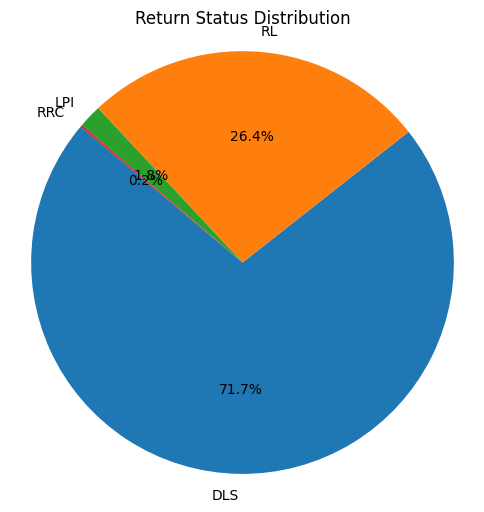

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))

plt.pie(return_status,labels=return_status.index,autopct='%1.1f%%', startangle=140)
plt.title('Return Status Distribution')
plt.axis('equal')  # Ensures pie is drawn as a circle
plt.show()

In [ ]:
payment = df['payment_method'].value_counts()

articles = df['article_type'].value_counts()

master_cat = df['master_category'].value_counts()

print(payment)
print(" ")
print(articles)
print(" ")
print(master_cat)

payment_method
on     2611
cod     982
Name: count, dtype: int64
 
article_type
Saree Blouse      2465
Palazzos           291
Salwar             249
Co-Ords            141
Dresses            137
Shirts              56
Harem Pants         49
Shorts              49
Churidar            43
Skirts              37
Tops                31
Ethnic Dresses      19
Trousers            11
Cushion Covers       7
Kurtas               4
Kurtis               3
Earrings             1
Name: count, dtype: int64
 
master_category
Apparel        3585
Home              7
Accessories       1
Name: count, dtype: int64


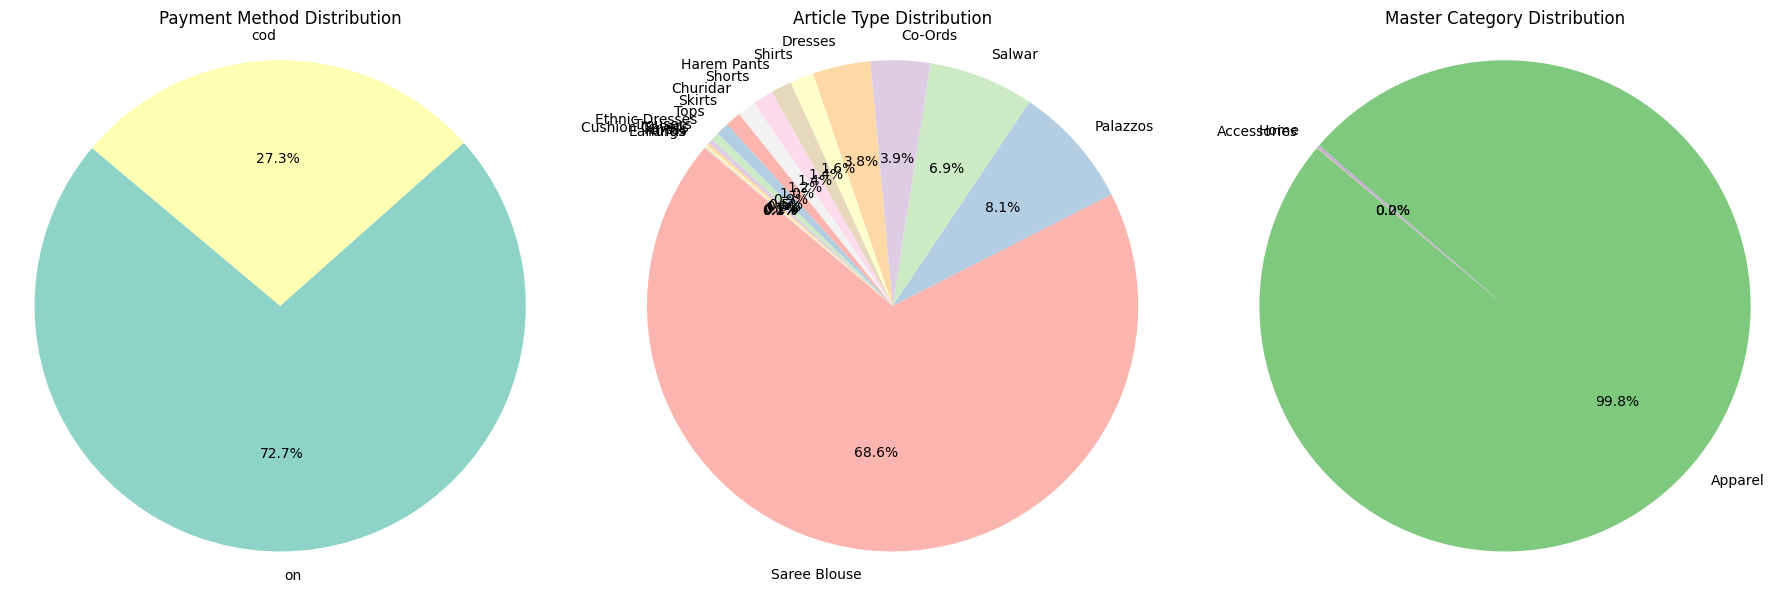

In [ ]:
import matplotlib.pyplot as plt

# Get value counts
payment = df['payment_method'].value_counts()
articles = df['article_type'].value_counts()
master_cat = df['master_category'].value_counts()

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Adjust width for spacing

# Pie chart for Payment Method
axes[0].pie(payment, labels=payment.index, autopct='%1.1f%%', startangle=140,
            colors=plt.cm.Set3.colors)
axes[0].set_title('Payment Method Distribution')
axes[0].axis('equal')

# Pie chart for Article Type
axes[1].pie(articles, labels=articles.index, autopct='%1.1f%%', startangle=140,
            colors=plt.cm.Pastel1.colors)
axes[1].set_title('Article Type Distribution')
axes[1].axis('equal')

# Pie chart for Master Category
axes[2].pie(master_cat, labels=master_cat.index, autopct='%1.1f%%', startangle=140,
            colors=plt.cm.Accent.colors)
axes[2].set_title('Master Category Distribution')
axes[2].axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()


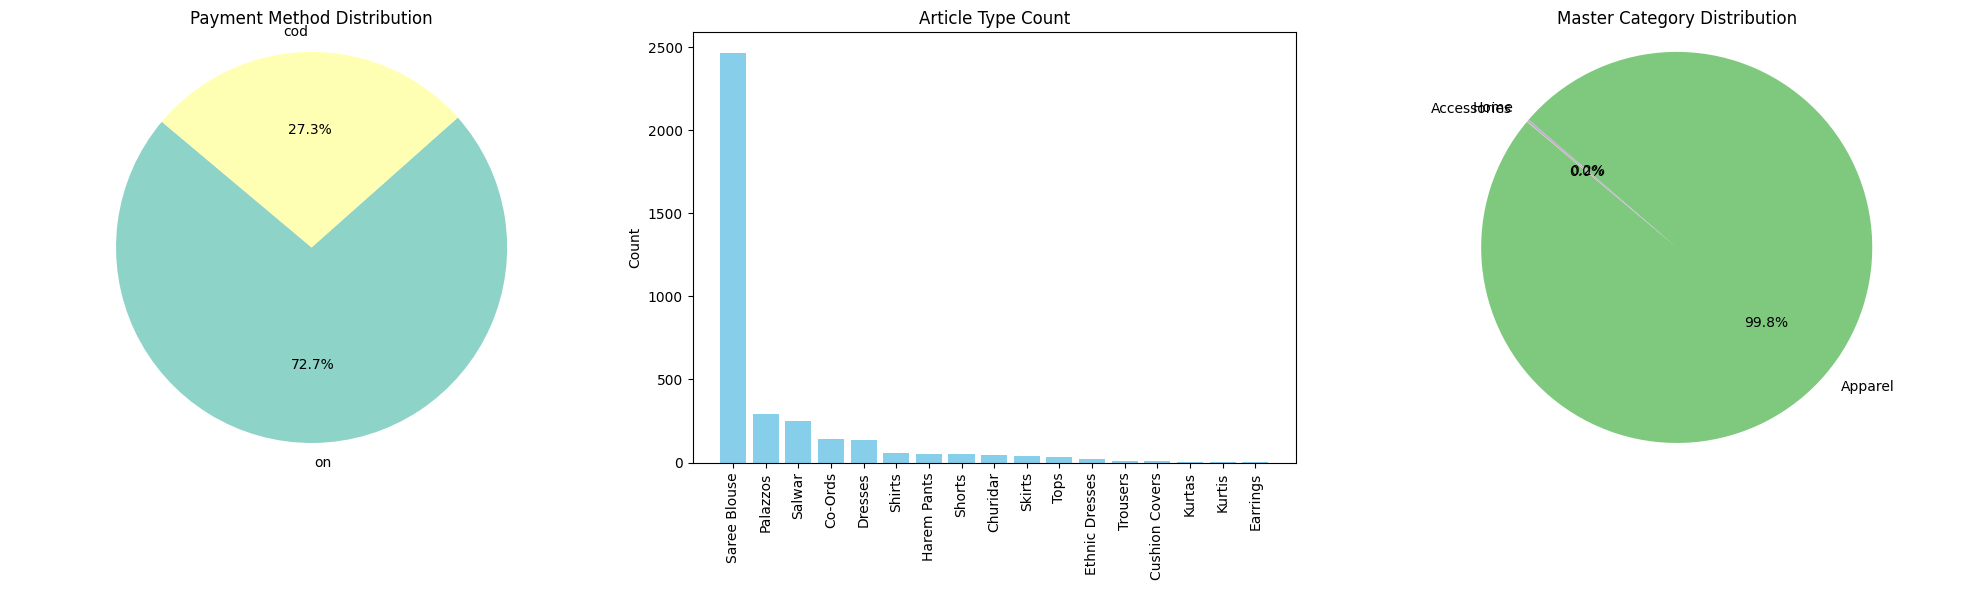

In [ ]:
import matplotlib.pyplot as plt

# Value counts
payment = df['payment_method'].value_counts()
articles = df['article_type'].value_counts()
master_cat = df['master_category'].value_counts()

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Pie chart for Payment Method
axes[0].pie(payment, labels=payment.index, autopct='%1.1f%%', startangle=140,
            colors=plt.cm.Set3.colors)
axes[0].set_title('Payment Method Distribution')
axes[0].axis('equal')

# Bar chart for Article Type
axes[1].bar(articles.index, articles.values, color='skyblue')
axes[1].set_title('Article Type Count')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=90)

# Pie chart for Master Category
axes[2].pie(master_cat, labels=master_cat.index, autopct='%1.1f%%', startangle=140,
            colors=plt.cm.Accent.colors)
axes[2].set_title('Master Category Distribution')
axes[2].axis('equal')

# Adjust layout
plt.tight_layout()
plt.show()


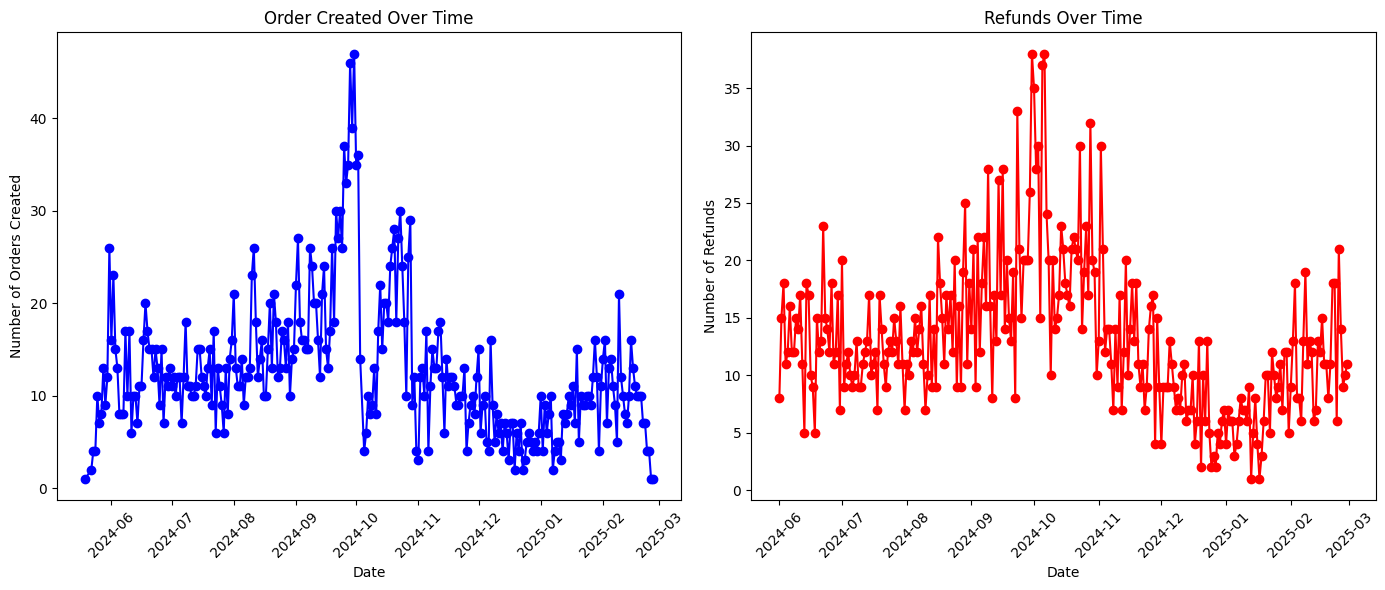

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert date columns to datetime
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d')
df['fr_refunded_date'] = pd.to_datetime(df['fr_refunded_date'], format='%Y%m%d', errors='coerce')

# Step 2: Group and count per date
created_counts = df['order_created_date'].value_counts().sort_index()
refunded_counts = df['fr_refunded_date'].value_counts().sort_index()

# Step 3: Plot line charts
plt.figure(figsize=(14, 6))

# Order Created Line Chart
plt.subplot(1, 2, 1)
plt.plot(created_counts.index, created_counts.values, color='blue', marker='o')
plt.title('Order Created Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders Created')
plt.xticks(rotation=45)

# Refunded Line Chart
plt.subplot(1, 2, 2)
plt.plot(refunded_counts.index, refunded_counts.values, color='red', marker='o')
plt.title('Refunds Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Refunds')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


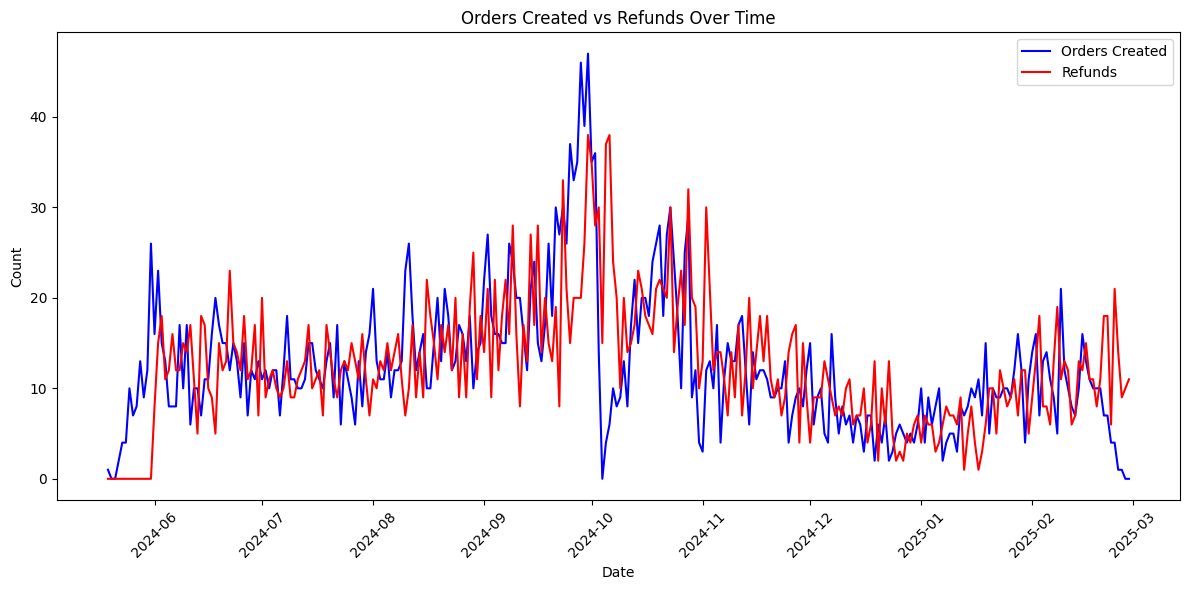

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Convert date columns to datetime
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d')
df['fr_refunded_date'] = pd.to_datetime(df['fr_refunded_date'], format='%Y%m%d', errors='coerce')

# Step 2: Count per day
created_counts = df['order_created_date'].value_counts().sort_index()
refunded_counts = df['fr_refunded_date'].value_counts().sort_index()

# Step 3: Create a full date range and reindex both to align
all_dates = pd.date_range(start=min(created_counts.index.min(), refunded_counts.index.min()),
                          end=max(created_counts.index.max(), refunded_counts.index.max()))

created_counts = created_counts.reindex(all_dates, fill_value=0)
refunded_counts = refunded_counts.reindex(all_dates, fill_value=0)

# Step 4: Overlapped line chart
plt.figure(figsize=(12, 6))
plt.plot(created_counts.index, created_counts.values, label='Orders Created', color='blue')
plt.plot(refunded_counts.index, refunded_counts.values, label='Refunds', color='red')

plt.title('Orders Created vs Refunds Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


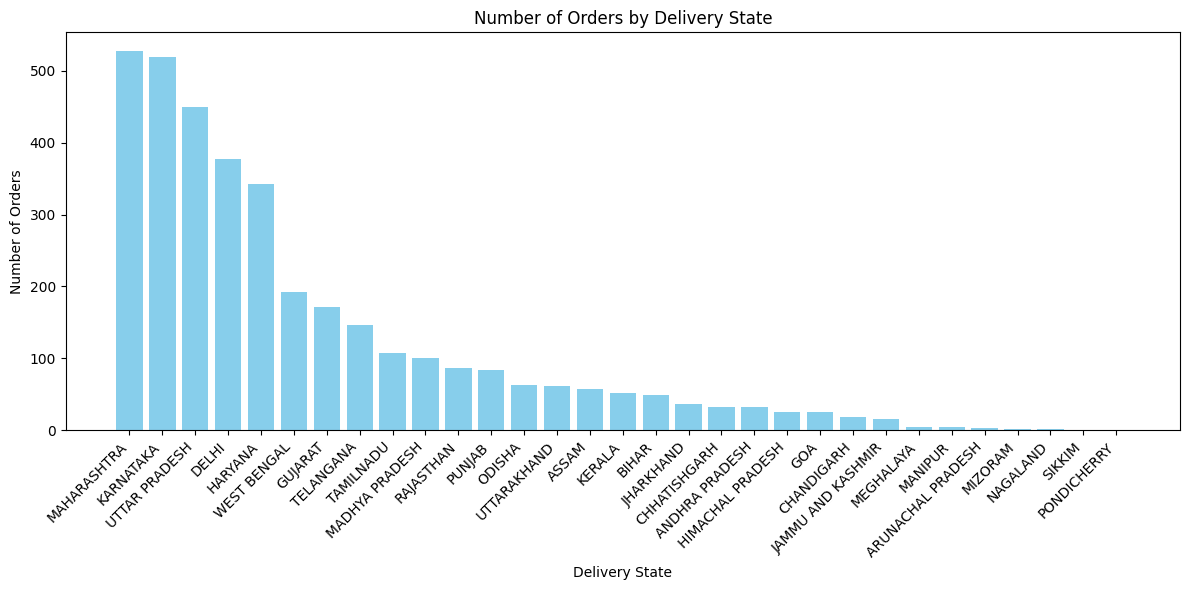

In [ ]:
import matplotlib.pyplot as plt

# Count the number of orders per Delivery_State
state_counts = df['Delivery_State'].value_counts()

# Plot bar chart
plt.figure(figsize=(12, 6))
plt.bar(state_counts.index, state_counts.values, color='skyblue')
plt.title('Number of Orders by Delivery State')
plt.xlabel('Delivery State')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


count    3593.000000
mean     1119.187300
std       372.836678
min       216.000000
25%       855.000000
50%       965.000000
75%      1499.000000
max      2530.000000
Name: item_revenue_inc_cashback, dtype: float64


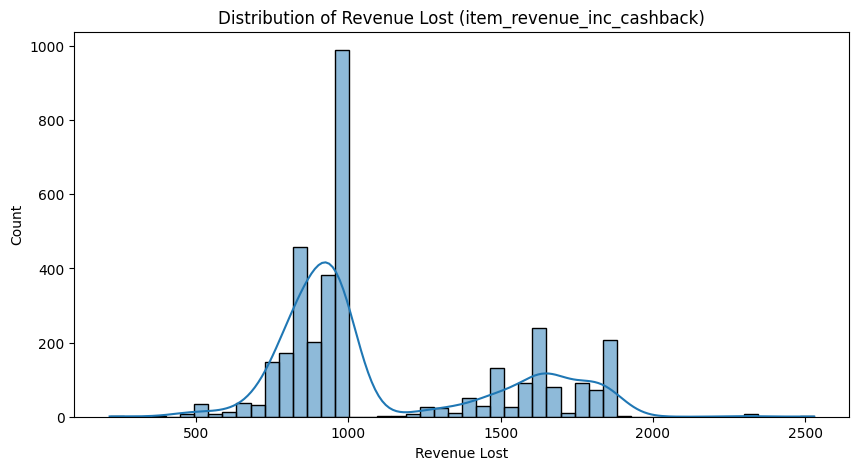

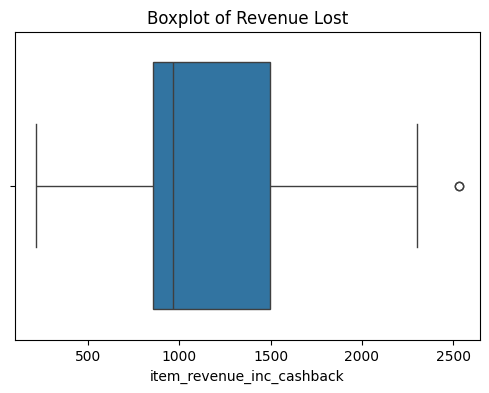

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic stats
print(df['item_revenue_inc_cashback'].describe())

# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df['item_revenue_inc_cashback'], bins=50, kde=True)
plt.title('Distribution of Revenue Lost (item_revenue_inc_cashback)')
plt.xlabel('Revenue Lost')
plt.show()

# Boxplot to check outliers
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['item_revenue_inc_cashback'])
plt.title('Boxplot of Revenue Lost')
plt.show()


Total Revenue Lost due to Returns: 4021239.9699999997
return_status
DLS    2577
RL      947
LPI      63
RRC       6
Name: count, dtype: int64
return_status
DLS    2902024.68
RL     1041422.29
LPI      71342.00
RRC       6451.00
Name: item_revenue_inc_cashback, dtype: float64


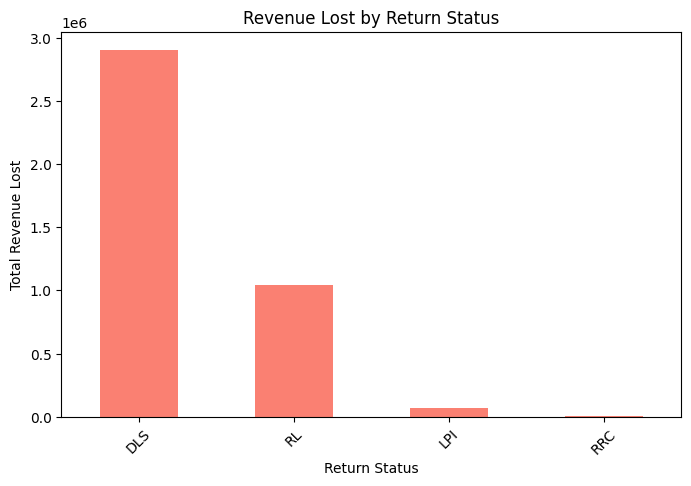

In [ ]:
# Total lost revenue due to returns
total_loss = df['item_revenue_inc_cashback'].sum()
print(f"Total Revenue Lost due to Returns: {total_loss}")

# Count of returns by return_status
return_counts = df['return_status'].value_counts()
print(return_counts)

# Lost revenue by return_status
loss_by_return = df.groupby('return_status')['item_revenue_inc_cashback'].sum().sort_values(ascending=False)
print(loss_by_return)

# Barplot of revenue loss by return status
plt.figure(figsize=(8, 5))
loss_by_return.plot(kind='bar', color='salmon')
plt.title('Revenue Lost by Return Status')
plt.ylabel('Total Revenue Lost')
plt.xlabel('Return Status')
plt.xticks(rotation=45)
plt.show()


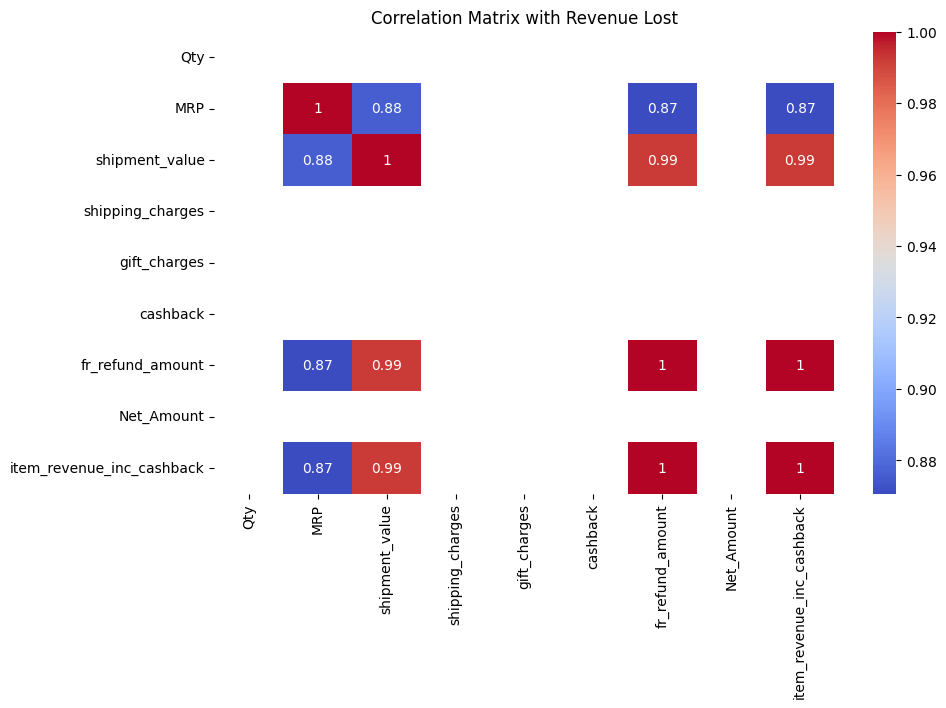

In [ ]:
numeric_features = ['Qty', 'MRP', 'shipment_value', 'shipping_charges', 'gift_charges', 'cashback', 'fr_refund_amount', 'Net_Amount']

corr = df[numeric_features + ['item_revenue_inc_cashback']].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Revenue Lost')
plt.show()


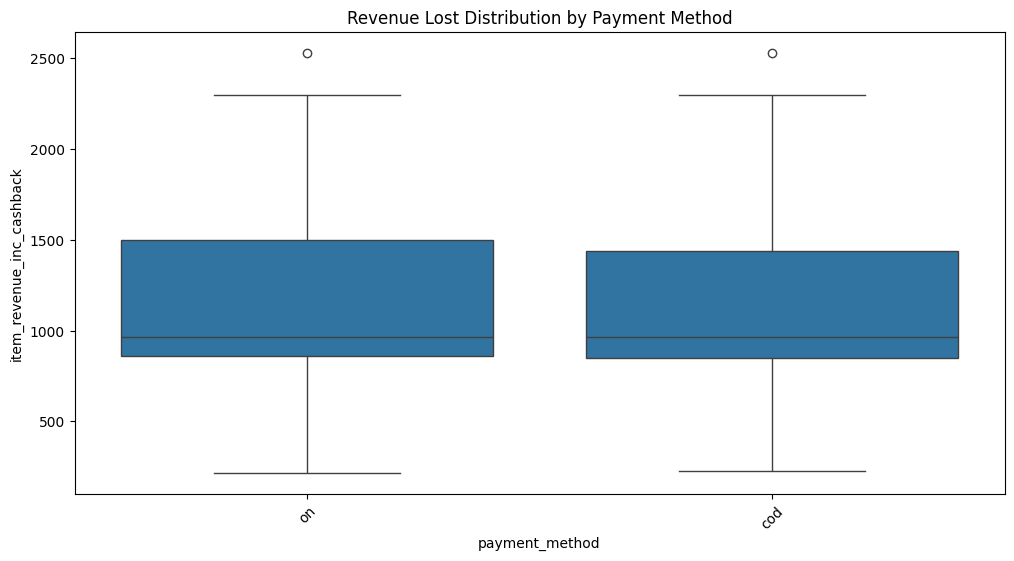

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='payment_method', y='item_revenue_inc_cashback', data=df)
plt.xticks(rotation=45)
plt.title('Revenue Lost Distribution by Payment Method')
plt.show()


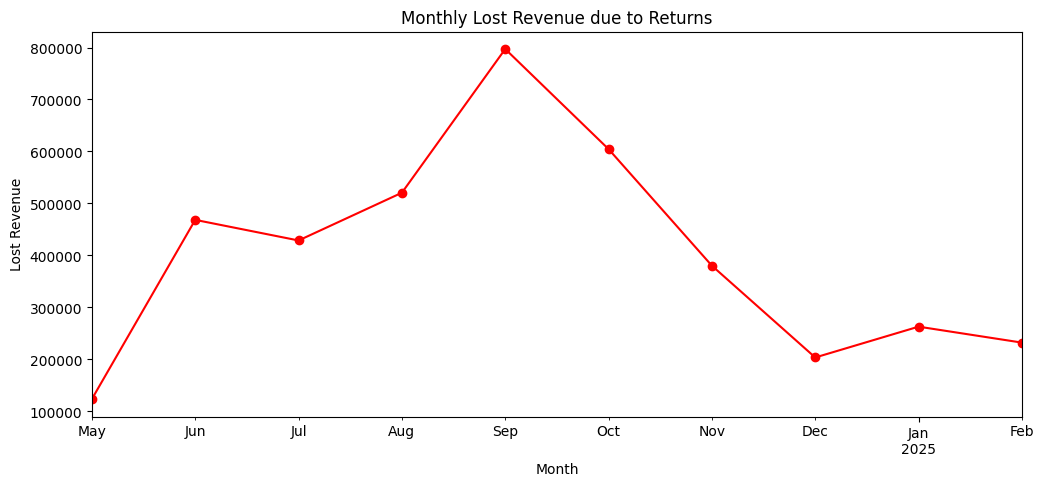

In [ ]:
# Convert order_created_date to datetime
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d')

# Aggregate lost revenue by month
monthly_loss = df.groupby(df['order_created_date'].dt.to_period('M'))['item_revenue_inc_cashback'].sum()

monthly_loss.plot(kind='line', figsize=(12, 5), marker='o', color='red')
plt.title('Monthly Lost Revenue due to Returns')
plt.xlabel('Month')
plt.ylabel('Lost Revenue')
plt.show()


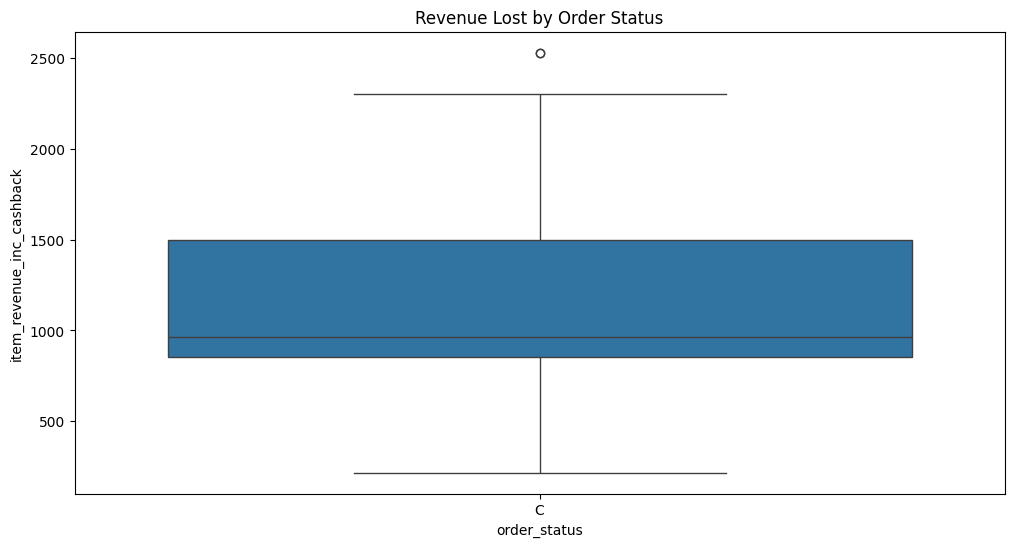

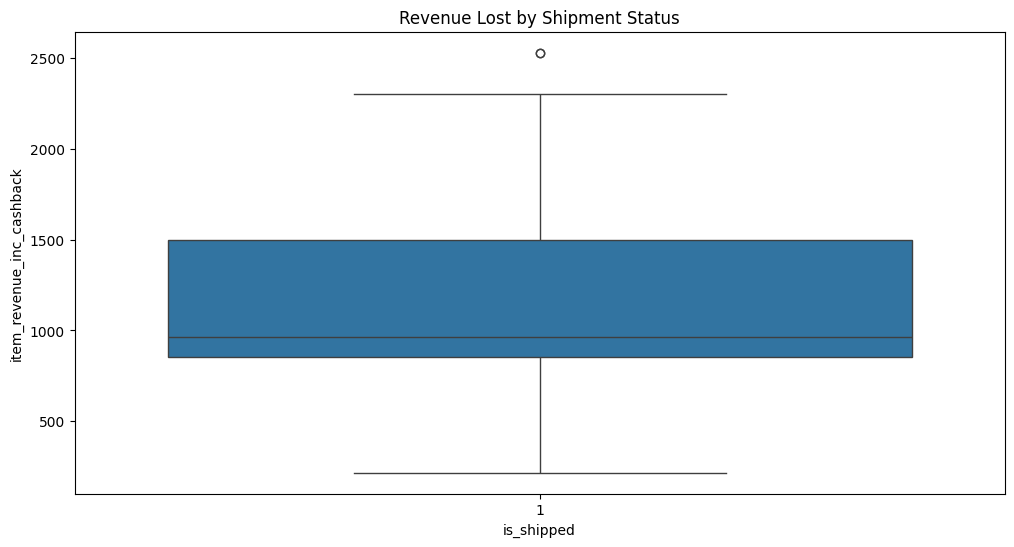

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='order_status', y='item_revenue_inc_cashback', data=df)
plt.title('Revenue Lost by Order Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='is_shipped', y='item_revenue_inc_cashback', data=df)
plt.title('Revenue Lost by Shipment Status')
plt.show()


Top 10 Customer PINs by Revenue Lost:
customer_pincode
201301    71310.0
122001    59048.0
560103    47008.0
560066    38974.0
201304    36875.0
122002    35638.0
122003    35493.0
560035    34293.0
411057    32433.0
201306    31675.0
Name: item_revenue_inc_cashback, dtype: float64


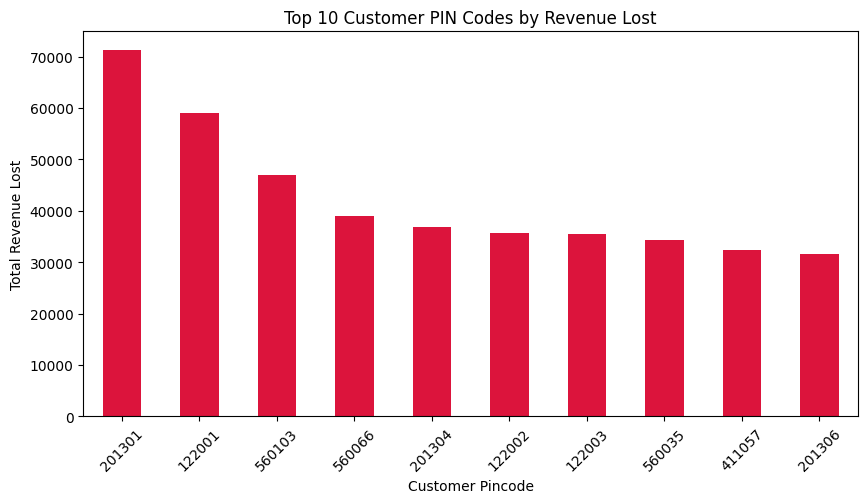

In [ ]:
top_customers = df.groupby('customer_pincode')['item_revenue_inc_cashback'].sum().sort_values(ascending=False).head(10)
print("Top 10 Customer PINs by Revenue Lost:")
print(top_customers)

top_customers.plot(kind='bar', figsize=(10,5), color='crimson')
plt.title('Top 10 Customer PIN Codes by Revenue Lost')
plt.xlabel('Customer Pincode')
plt.ylabel('Total Revenue Lost')
plt.xticks(rotation=45)
plt.show()



In [ ]:
total_orders = len(df)
returned_orders = df[df['return_status'].notna()]  # or fr_is_refunded == 1

return_rate = len(returned_orders) / total_orders * 100
total_loss = df['item_revenue_inc_cashback'].sum()

print(f"Total Orders: {total_orders}")
print(f"Returned Orders: {len(returned_orders)} ({return_rate:.2f}%)")
print(f"Total Revenue Lost Due to Returns: ₹{total_loss:,.2f}")


Total Orders: 3593
Returned Orders: 3593 (100.00%)
Total Revenue Lost Due to Returns: ₹4,021,239.97


Return Counts:
 return_status
DLS    2577
RL      947
LPI      63
RRC       6
Name: count, dtype: int64

Revenue Lost by Return Reason:
 return_status
DLS    2902024.68
RL     1041422.29
LPI      71342.00
RRC       6451.00
Name: item_revenue_inc_cashback, dtype: float64


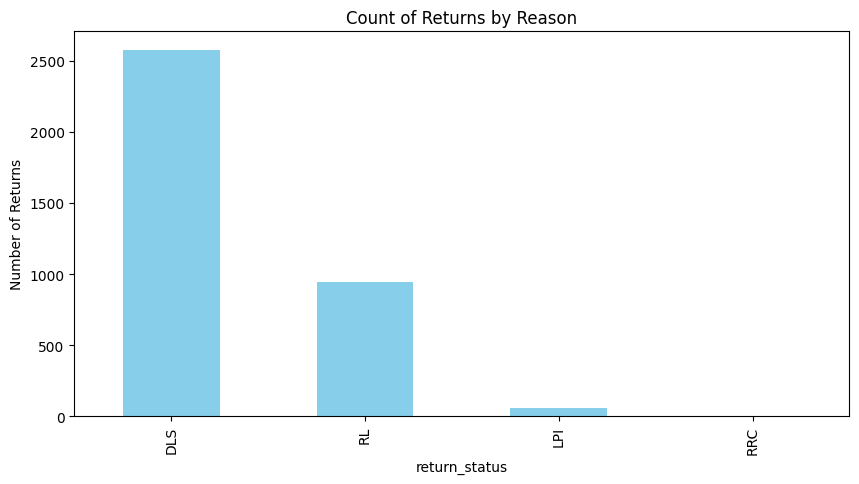

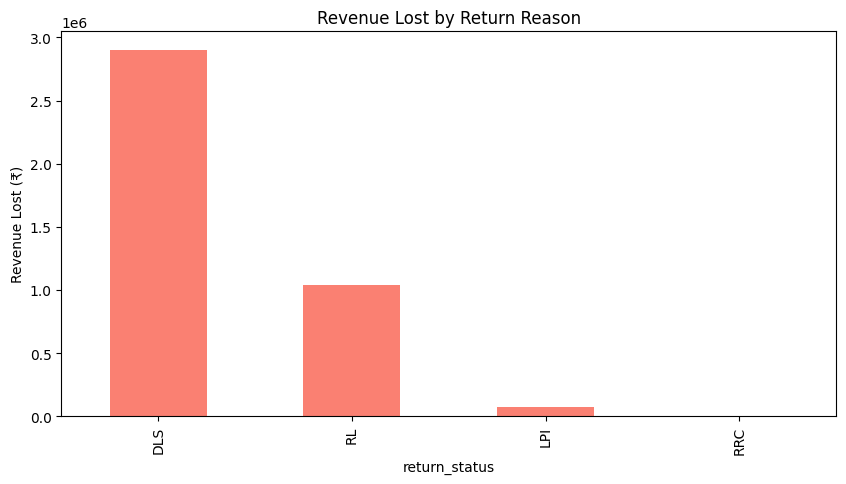

In [ ]:
return_counts = df['return_status'].value_counts()
loss_by_return = df.groupby('return_status')['item_revenue_inc_cashback'].sum().sort_values(ascending=False)

print("Return Counts:\n", return_counts)
print("\nRevenue Lost by Return Reason:\n", loss_by_return)

# Visualize
plt.figure(figsize=(10,5))
return_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Returns by Reason')
plt.ylabel('Number of Returns')
plt.show()

plt.figure(figsize=(10,5))
loss_by_return.plot(kind='bar', color='salmon')
plt.title('Revenue Lost by Return Reason')
plt.ylabel('Revenue Lost (₹)')
plt.show()


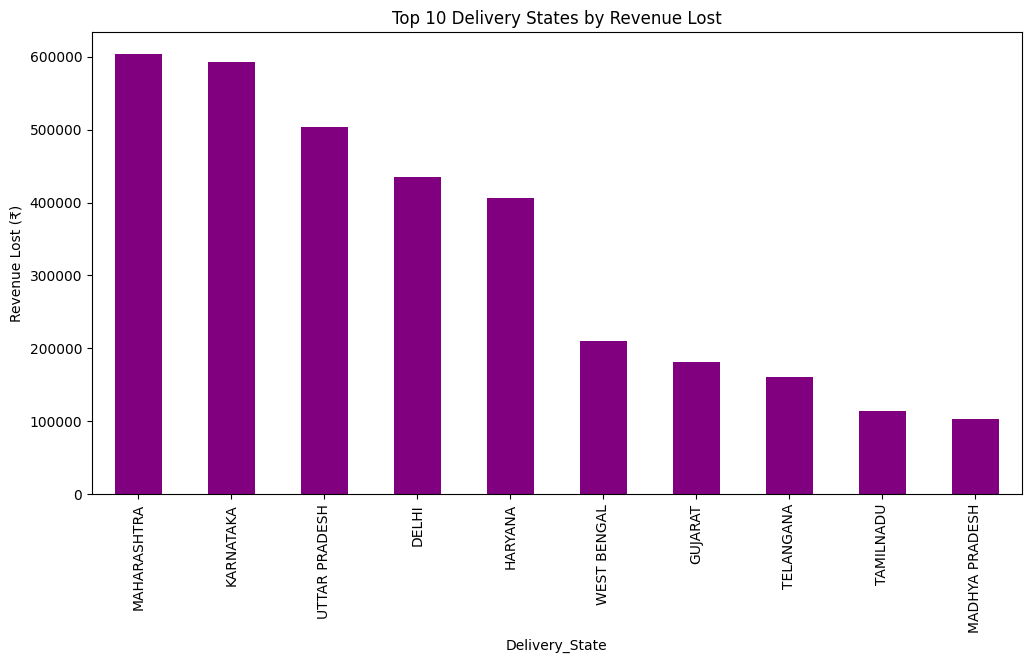

In [ ]:
top_states_loss = df.groupby('Delivery_State')['item_revenue_inc_cashback'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_states_loss.plot(kind='bar', color='purple', title='Top 10 Delivery States by Revenue Lost')
plt.ylabel('Revenue Lost (₹)')
plt.show()


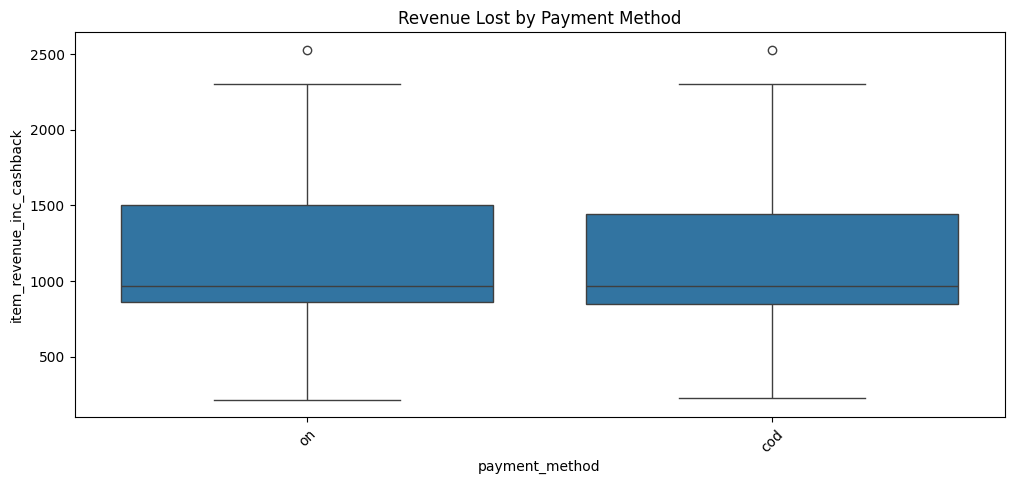

order_status
C    1.0
Name: return_status, dtype: float64


In [ ]:
plt.figure(figsize=(12,5))
sns.boxplot(x='payment_method', y='item_revenue_inc_cashback', data=df)
plt.title('Revenue Lost by Payment Method')
plt.xticks(rotation=45)
plt.show()

return_rate_by_order_status = df.groupby('order_status')['return_status'].apply(lambda x: x.notna().mean())
print(return_rate_by_order_status)


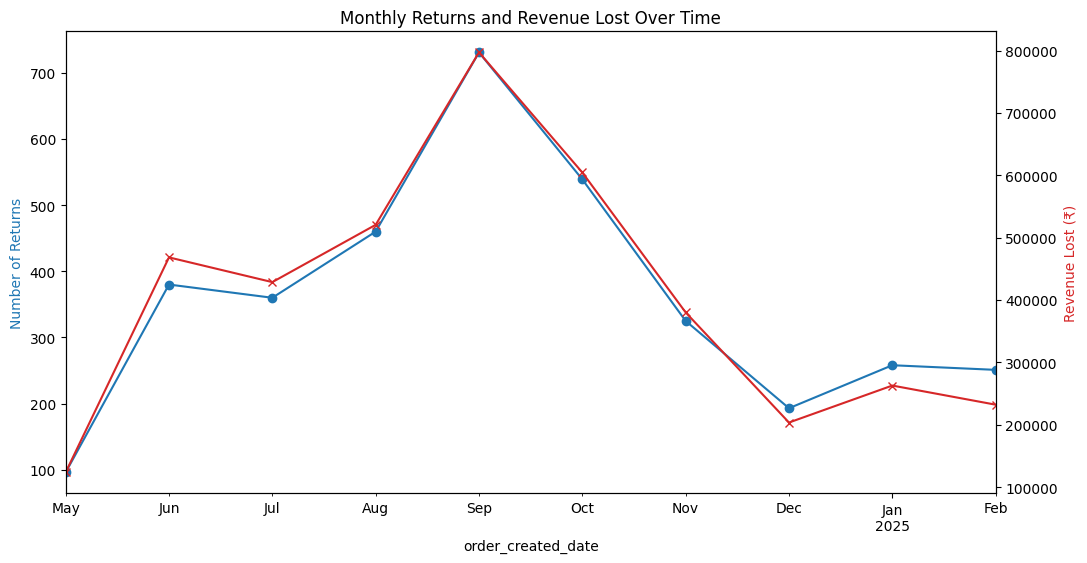

In [ ]:
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d')
monthly_returns = df[df['return_status'].notna()].groupby(df['order_created_date'].dt.to_period('M')).size()
monthly_loss = df.groupby(df['order_created_date'].dt.to_period('M'))['item_revenue_inc_cashback'].sum()

fig, ax1 = plt.subplots(figsize=(12,6))

ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Returns', color='tab:blue')
monthly_returns.plot(kind='line', ax=ax1, color='tab:blue', marker='o')

ax2 = ax1.twinx()
ax2.set_ylabel('Revenue Lost (₹)', color='tab:red')
monthly_loss.plot(kind='line', ax=ax2, color='tab:red', marker='x')

plt.title('Monthly Returns and Revenue Lost Over Time')
plt.show()


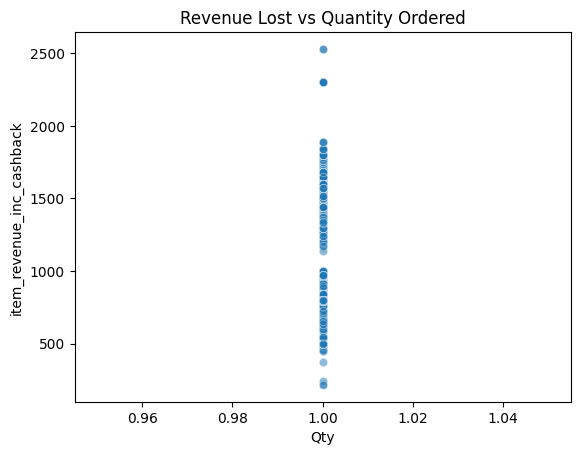

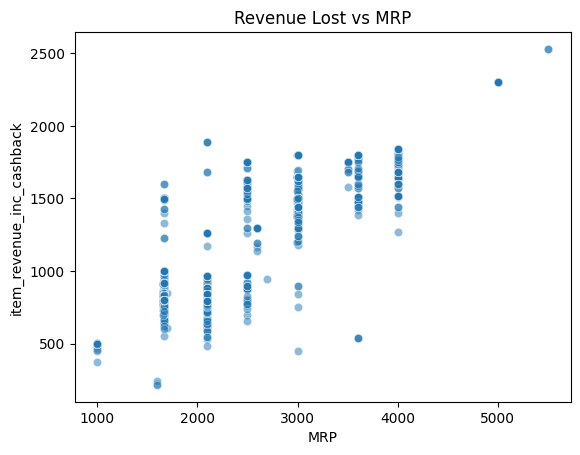

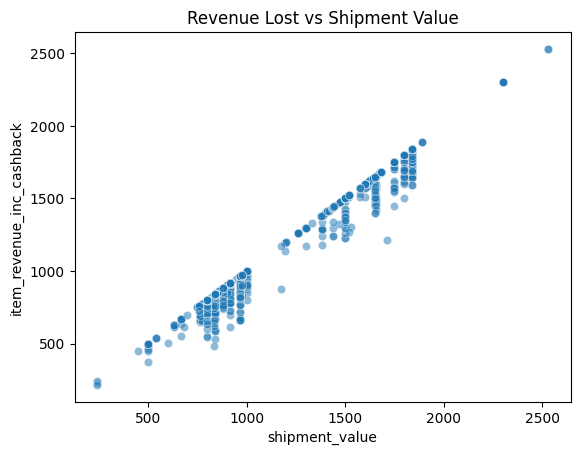

In [ ]:
sns.scatterplot(x='Qty', y='item_revenue_inc_cashback', data=df, alpha=0.5)
plt.title('Revenue Lost vs Quantity Ordered')
plt.show()

sns.scatterplot(x='MRP', y='item_revenue_inc_cashback', data=df, alpha=0.5)
plt.title('Revenue Lost vs MRP')
plt.show()

sns.scatterplot(x='shipment_value', y='item_revenue_inc_cashback', data=df, alpha=0.5)
plt.title('Revenue Lost vs Shipment Value')
plt.show()


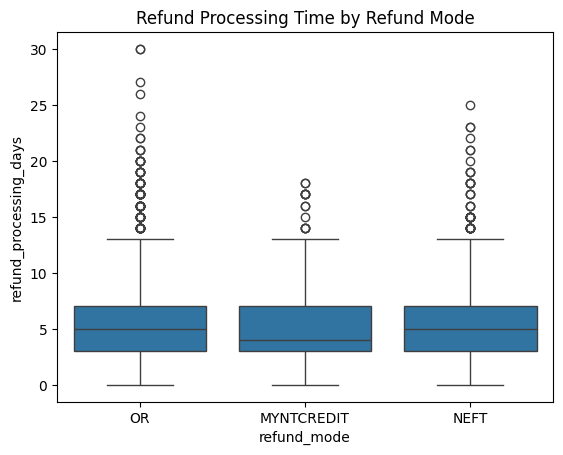

In [ ]:
df['order_shipped_date'] = pd.to_datetime(df['order_shipped_date'], format='%Y%m%d', errors='coerce')
df['fr_refunded_date'] = pd.to_datetime(df['fr_refunded_date'], format='%Y%m%d', errors='coerce')
df['refund_processing_days'] = (df['fr_refunded_date'] - df['order_shipped_date']).dt.days

sns.boxplot(x='refund_mode', y='refund_processing_days', data=df)
plt.title('Refund Processing Time by Refund Mode')
plt.show()


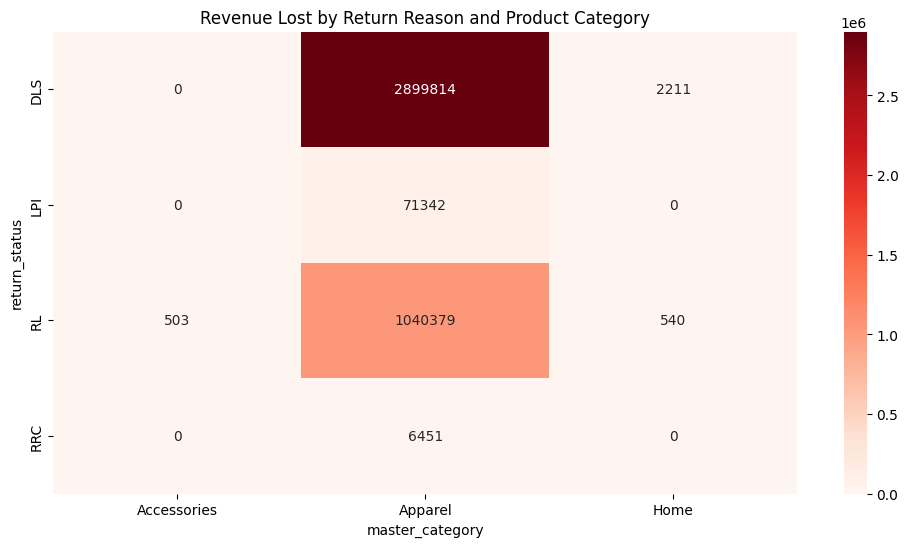

In [ ]:
pivot = df.pivot_table(
    index='return_status',
    columns='master_category',
    values='item_revenue_inc_cashback',
    aggfunc='sum',
    fill_value=0
)

plt.figure(figsize=(12,6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='Reds')
plt.title("Revenue Lost by Return Reason and Product Category")
plt.show()


In [ ]:
# Aggregate total revenue and total return loss by customer_pincode
agg_cust = df.groupby('customer_pincode').agg(
    total_revenue=('shipment_value', 'sum'),
    total_return_loss=('item_revenue_inc_cashback', 'sum'),
    orders=('packet_id', 'count')
)
agg_cust['return_rate'] = agg_cust['total_return_loss'] / agg_cust['total_revenue']

agg_cust.sort_values('return_rate', ascending=False).head(10)


,total_revenue,total_return_loss,orders,return_rate
customer_pincode,,,,
854334,965,965.0,1,1.0
854312,1840,1840.0,1,1.0
854311,1380,1380.0,1,1.0
854301,915,915.0,1,1.0
852201,1656,1656.0,1,1.0
110005,2639,2639.0,3,1.0
110006,2805,2805.0,2,1.0
834009,965,965.0,1,1.0
834008,965,965.0,1,1.0


from matplotlib import pyplot as plt
_df_0['total_revenue'].plot(kind='hist', bins=20, title='total_revenue')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['total_return_loss'].plot(kind='hist', bins=20, title='total_return_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['orders'].plot(kind='hist', bins=20, title='orders')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='total_revenue', y='total_return_loss', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='total_return_loss', y='orders', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['return_rate']
  ys = series['total_revenue']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('return_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('return_rate')
_ = plt.ylabel('total_revenue')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['return_rate']
  ys = series['total_return_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_6.sort_values('return_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('return_rate')
_ = plt.ylabel('total_return_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['return_rate']
  ys = series['orders']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_7.sort_values('return_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('return_rate')
_ = plt.ylabel('orders')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['return_rate']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'return_rate'}, axis=1)
              .sort_values('return_rate', ascending=True))
  xs = counted['return_rate']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('return_rate', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('return_rate')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_9['total_revenue'].plot(kind='line', figsize=(8, 4), title='total_revenue')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['total_return_loss'].plot(kind='line', figsize=(8, 4), title='total_return_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['orders'].plot(kind='line', figsize=(8, 4), title='orders')
plt.gca().spines[['top', 'right']].set_visible(False)

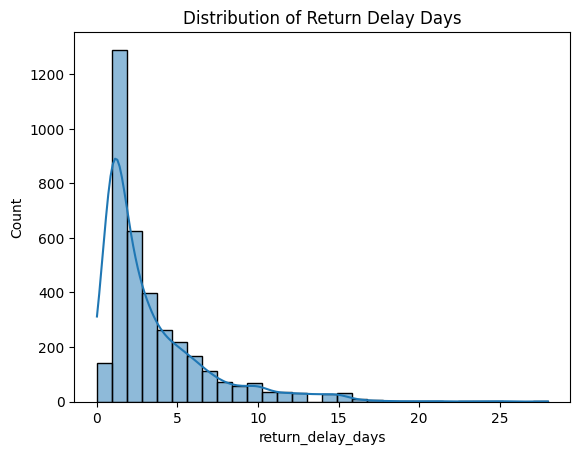

<ipython-input-51-23815900dfe1>:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  loss_by_delay = df.groupby(pd.cut(df['return_delay_days'], bins=[0,3,7,15,30,90,180]))['item_revenue_inc_cashback'].sum()


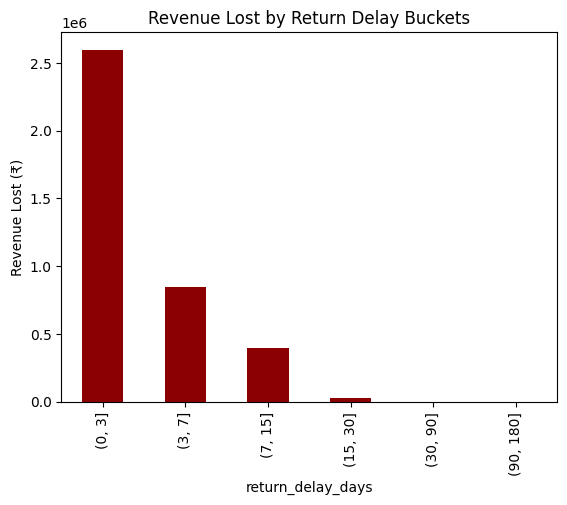

In [ ]:
df['order_delivered_date'] = pd.to_datetime(df['order_delivered_date'], format='%Y%m%d', errors='coerce')
df['fr_refunded_date'] = pd.to_datetime(df['fr_refunded_date'], format='%Y%m%d', errors='coerce')
df['return_delay_days'] = (df['fr_refunded_date'] - df['order_delivered_date']).dt.days

sns.histplot(df['return_delay_days'].dropna(), bins=30, kde=True)
plt.title('Distribution of Return Delay Days')
plt.show()

loss_by_delay = df.groupby(pd.cut(df['return_delay_days'], bins=[0,3,7,15,30,90,180]))['item_revenue_inc_cashback'].sum()
loss_by_delay.plot(kind='bar', color='darkred')
plt.title('Revenue Lost by Return Delay Buckets')
plt.ylabel('Revenue Lost (₹)')
plt.show()


In [ ]:
payment_return_stats = df.groupby('payment_method').agg(
    return_count=('return_status', lambda x: x.notna().sum()),
    total_return_loss=('item_revenue_inc_cashback', 'sum'),
    total_orders=('packet_id', 'count')
)
payment_return_stats['return_rate'] = payment_return_stats['return_count'] / payment_return_stats['total_orders']

print(payment_return_stats.sort_values('return_rate', ascending=False))


                return_count  total_return_loss  total_orders  return_rate
payment_method                                                            
cod                      982         1080088.00           982          1.0
on                      2611         2941151.97          2611          1.0


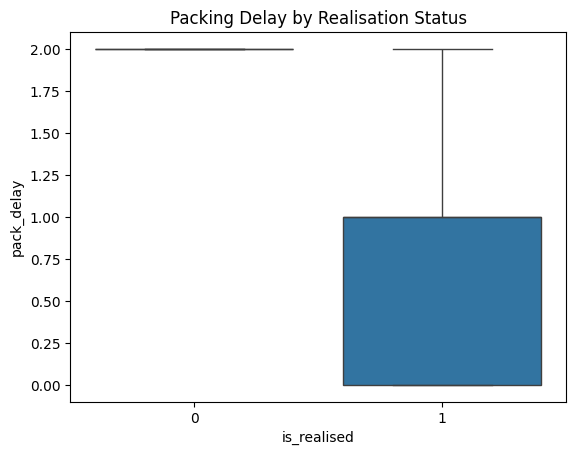

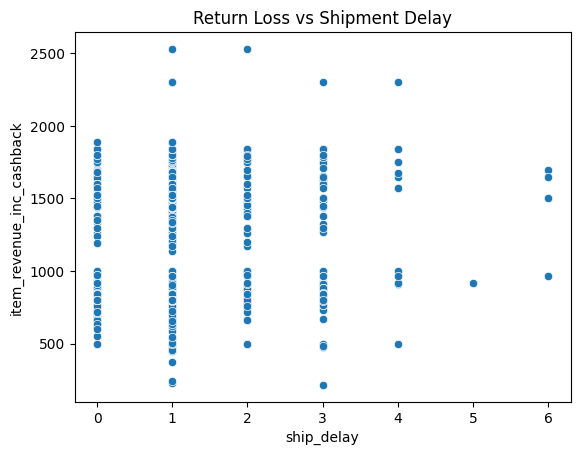

In [ ]:
df['order_created_date'] = pd.to_datetime(df['order_created_date'], format='%Y%m%d', errors='coerce')
df['order_packed_date'] = pd.to_datetime(df['order_packed_date'], format='%Y%m%d', errors='coerce')
df['order_shipped_date'] = pd.to_datetime(df['order_shipped_date'], format='%Y%m%d', errors='coerce')

df['pack_delay'] = (df['order_packed_date'] - df['order_created_date']).dt.days
df['ship_delay'] = (df['order_shipped_date'] - df['order_packed_date']).dt.days

sns.boxplot(x='is_realised', y='pack_delay', data=df)
plt.title('Packing Delay by Realisation Status')
plt.show()

sns.scatterplot(x='ship_delay', y='item_revenue_inc_cashback', data=df)
plt.title('Return Loss vs Shipment Delay')
plt.show()


In [ ]:
df = df.drop(columns=['packet_id', 'core_item_id', 'Qty', 'item_status',
       'order_status', 'brand',
       'tax', 'tax_rate', 'igst_rate', 'cgst_rate', 'sgst_rate',
       'location_type','Seller_state_Code', 'warehouse_id', 'warehouse_name', 'exchange_ID',
       'warehouse_pincode', 'customer_pincode',
       'foci_warehouse_id', 'state', 'dm_warehouse_pincode', 'warehouse_city',
       'lmc_warehouse_id', 'row_num', 'item_revenue_inc_cashback', 'gift_charges',
       'GiftCard', 'phonepe', 'loyalty_pts_used', 'cashback',
       'Instant_Cashback', 'myntra_credits', 'Mynts', 'fr_refund_amount',
       'TCS', 'seller_name', 'Net_Amount', 'certificateNumber', 'Seller_GSTIN',
       'Shipping_case', 'Tax_Seller_GSTIN', 'base_amount', 'tds_rate',
       'tcs_amount', 'tds_amount', 'cgst_tcs_amount', 'sgst_tcs_amount',
       'igst_tcs_amount'])

In [ ]:
df.columns

Index(['is_shipped', 'is_realised', 'is_delivered', 'fr_is_refunded',
       'order_delivered_date', 'return_status', 'payment_method',
       'article_type', 'master_category', 'gender', 'order_created_date',
       'order_packed_date', 'order_shipped_date', 'fr_refunded_date',
       'fr_restocked_date', 'return_status_display_name', 'last_modified_on',
       'Delivery_State', 'refund_mode', 'MRP', 'shipment_value',
       'shipping_charges'],
      dtype='object')

Shipped Count: 3593
Realized Count: 3592
Delivered Count: 3593
Refunded Count: 3593
Average Shipment Value (Refunded): 1137.3637628722515
Average Shipment Value (Not Refunded): nan
Delivery Mode - Return Counts: 
refund_mode
OR            2526
NEFT           707
MYNTCREDIT     360
Name: count, dtype: int64


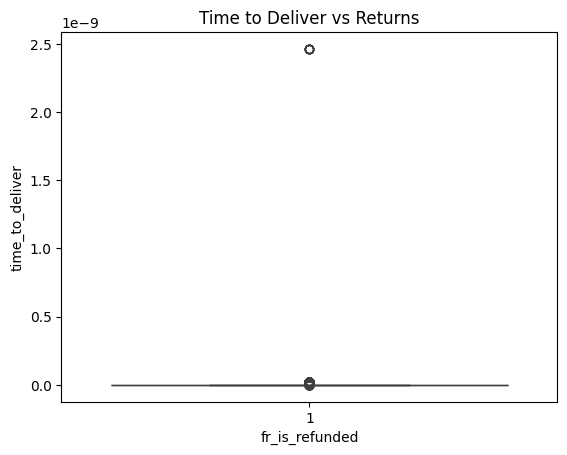

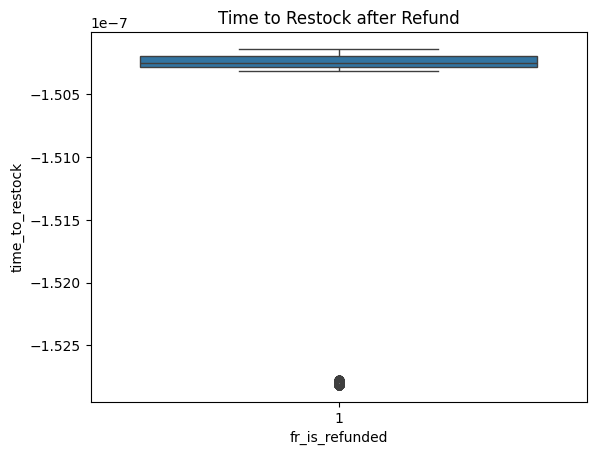

In [ ]:
import pandas as pd

# Load your dataset (assuming it's a CSV file)
# df = pd.read_csv('path_to_your_file.csv')

# Convert the relevant columns to datetime, ensuring missing values are handled
df['order_created_date'] = pd.to_datetime(df['order_created_date'], errors='coerce')
df['order_packed_date'] = pd.to_datetime(df['order_packed_date'], errors='coerce')
df['order_shipped_date'] = pd.to_datetime(df['order_shipped_date'], errors='coerce')
df['fr_refunded_date'] = pd.to_datetime(df['fr_refunded_date'], errors='coerce')
df['fr_restocked_date'] = pd.to_datetime(df['fr_restocked_date'], errors='coerce')

# 1. Count of shipped, realized, delivered, and refunded items
shipped_count = df['is_shipped'].sum()
realized_count = df['is_realised'].sum()
delivered_count = df['is_delivered'].sum()
refunded_count = df['fr_is_refunded'].sum()

print(f"Shipped Count: {shipped_count}")
print(f"Realized Count: {realized_count}")
print(f"Delivered Count: {delivered_count}")
print(f"Refunded Count: {refunded_count}")

# 2. In-depth analysis of order dates
# Calculate time taken for each process
df['time_to_pack'] = (df['order_packed_date'] - df['order_created_date']).dt.total_seconds() / (60 * 60)  # in hours
df['time_to_ship'] = (df['order_shipped_date'] - df['order_packed_date']).dt.total_seconds() / (60 * 60)  # in hours
df['time_to_refund'] = (df['fr_refunded_date'] - df['order_shipped_date']).dt.total_seconds() / (60 * 60)  # in hours

# 3. Check if there's a relation between time and returns
# Optional: You can add a scatter plot or correlation matrix if needed

# 4. Time taken to restock after refund
# Handling missing values in date columns
df['time_to_restock'] = (df['fr_restocked_date'] - df['fr_refunded_date']).dt.total_seconds() / (60 * 60)  # in hours
df['time_to_restock'] = df['time_to_restock'].fillna(0)  # Handle missing values, you can change the strategy

# 5. Analysis of MRP and Shipment Value
# Checking if shipment value affects returns/cancellations
shipment_value_returned = df[df['fr_is_refunded'] == 1]['shipment_value'].mean()
shipment_value_non_returned = df[df['fr_is_refunded'] == 0]['shipment_value'].mean()

print(f"Average Shipment Value (Refunded): {shipment_value_returned}")
print(f"Average Shipment Value (Not Refunded): {shipment_value_non_returned}")

# 6. Time to deliver and returns analysis
df['time_to_deliver'] = (df['order_shipped_date'] - df['order_created_date']).dt.total_seconds() / (60 * 60)  # in hours

# Mode of delivery and return analysis
delivery_mode_returned = df[df['fr_is_refunded'] == 1]['refund_mode'].value_counts()

print(f"Delivery Mode - Return Counts: \n{delivery_mode_returned}")

# Optional: More advanced visualizations with seaborn or matplotlib for better insights
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting time to deliver vs returns
sns.boxplot(x='fr_is_refunded', y='time_to_deliver', data=df)
plt.title('Time to Deliver vs Returns')
plt.show()

# Plotting time to restock after refund
sns.boxplot(x='fr_is_refunded', y='time_to_restock', data=df)
plt.title('Time to Restock after Refund')
plt.show()


In [ ]:
import pandas as pd

# Load your dataset (assuming it's a CSV file)
# df = pd.read_csv('path_to_your_file.csv')

# Convert the relevant columns to datetime, ensuring missing values are handled
df['order_created_date'] = pd.to_datetime(df['order_created_date'], errors='coerce')
df['order_packed_date'] = pd.to_datetime(df['order_packed_date'], errors='coerce')
df['order_shipped_date'] = pd.to_datetime(df['order_shipped_date'], errors='coerce')
df['fr_refunded_date'] = pd.to_datetime(df['fr_refunded_date'], errors='coerce')
df['fr_restocked_date'] = pd.to_datetime(df['fr_restocked_date'], errors='coerce')


In [ ]:

# 1. Count of shipped, realized, delivered, and refunded items
shipped_count = df['is_shipped'].sum()
realized_count = df['is_realised'].sum()
delivered_count = df['is_delivered'].sum()
refunded_count = df['fr_is_refunded'].sum()

print(f"Shipped Count: {shipped_count}")
print(f"Realized Count: {realized_count}")
print(f"Delivered Count: {delivered_count}")
print(f"Refunded Count: {refunded_count}")


Shipped Count: 3593
Realized Count: 3592
Delivered Count: 3593
Refunded Count: 3593


In [ ]:

# 2. In-depth analysis of order dates
# Calculate time taken for each process
df['time_to_pack'] = (df['order_packed_date'] - df['order_created_date']).dt.total_seconds() / (60 * 60)  # in hours
df['time_to_ship'] = (df['order_shipped_date'] - df['order_packed_date']).dt.total_seconds() / (60 * 60)  # in hours
df['time_to_refund'] = (df['fr_refunded_date'] - df['order_shipped_date']).dt.total_seconds() / (60 * 60)  # in hours


In [ ]:

# 3. Statistical summary for time taken for each process
time_to_pack_summary = df['time_to_pack'].describe()
time_to_ship_summary = df['time_to_ship'].describe()
time_to_refund_summary = df['time_to_refund'].describe()

print(f"\nTime to Pack - Summary: \n{time_to_pack_summary}")
print(f"\nTime to Ship - Summary: \n{time_to_ship_summary}")
print(f"\nTime to Refund - Summary: \n{time_to_refund_summary}")



Time to Pack - Summary: 
count    3.593000e+03
mean     3.397501e-12
std      8.220605e-11
min      0.000000e+00
25%      0.000000e+00
50%      2.777778e-13
75%      2.777778e-13
max      2.463889e-09
Name: time_to_pack, dtype: float64

Time to Ship - Summary: 
count    3.593000e+03
mean     3.914633e-12
std      8.223638e-11
min      0.000000e+00
25%      2.777778e-13
50%      2.777778e-13
75%      2.777778e-13
max      2.463889e-09
Name: time_to_ship, dtype: float64

Time to Refund - Summary: 
count    3.593000e+03
mean     2.290928e-11
std      2.087358e-10
min      0.000000e+00
25%      8.333333e-13
50%      1.388889e-12
75%      2.777778e-12
max      2.469722e-09
Name: time_to_refund, dtype: float64


In [ ]:

# 4. Time taken to restock after refund
# Handling missing values in date columns
df['time_to_restock'] = (df['fr_restocked_date'] - df['fr_refunded_date']).dt.total_seconds() / (60 * 60)  # in hours
df['time_to_restock'] = df['time_to_restock'].fillna(0)  # Handle missing values, you can change the strategy

# Restock time summary
time_to_restock_summary = df['time_to_restock'].describe()

print(f"\nTime to Restock After Refund - Summary: \n{time_to_restock_summary}")




Time to Restock After Refund - Summary: 
count    3.593000e+03
mean    -1.506134e-07
std      9.233976e-10
min     -1.528131e-07
25%     -1.502828e-07
50%     -1.502500e-07
75%     -1.501975e-07
max     -1.501389e-07
Name: time_to_restock, dtype: float64


In [ ]:
# 5. Analysis of MRP and Shipment Value
# Checking if shipment value affects returns/cancellations
shipment_value_returned = df[df['fr_is_refunded'] == 1]['shipment_value'].mean()
shipment_value_non_returned = df[df['fr_is_refunded'] == 0]['shipment_value'].mean()

print(f"\nAverage Shipment Value (Refunded): {shipment_value_returned}")
print(f"Average Shipment Value (Not Refunded): {shipment_value_non_returned}")




Average Shipment Value (Refunded): 1137.3637628722515
Average Shipment Value (Not Refunded): nan


In [ ]:
# 6. Time to deliver and returns analysis
df['time_to_deliver'] = (df['order_shipped_date'] - df['order_created_date']).dt.total_seconds() / (60 * 60)  # in hours

# Mode of delivery and return analysis
delivery_mode_returned = df[df['fr_is_refunded'] == 1]['refund_mode'].value_counts()

print(f"\nDelivery Mode - Return Counts: \n{delivery_mode_returned}")




Delivery Mode - Return Counts: 
refund_mode
OR            2526
NEFT           707
MYNTCREDIT     360
Name: count, dtype: int64


In [ ]:

# Summary of Time to Deliver for Returns
time_to_deliver_returned_summary = df[df['fr_is_refunded'] == 1]['time_to_deliver'].describe()
time_to_deliver_non_returned_summary = df[df['fr_is_refunded'] == 0]['time_to_deliver'].describe()

print(f"\nTime to Deliver - Returned Items Summary: \n{time_to_deliver_returned_summary}")
print(f"Time to Deliver - Non-Returned Items Summary: \n{time_to_deliver_non_returned_summary}")



Time to Deliver - Returned Items Summary: 
count    3.593000e+03
mean     7.312135e-12
std      1.161753e-10
min      0.000000e+00
25%      2.777778e-13
50%      5.555556e-13
75%      5.555556e-13
max      2.464167e-09
Name: time_to_deliver, dtype: float64
Time to Deliver - Non-Returned Items Summary: 
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: time_to_deliver, dtype: float64


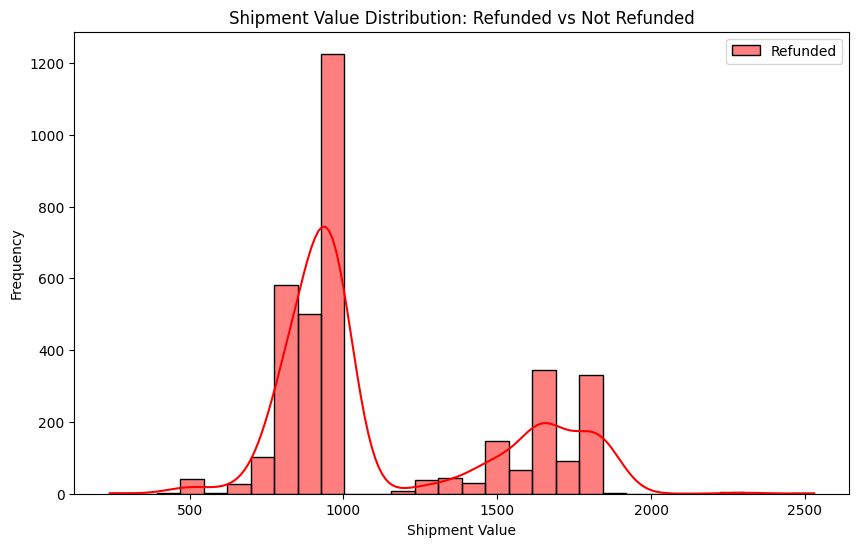

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df[df['fr_is_refunded'] == 1]['shipment_value'], color='red', kde=True, label='Refunded', bins=30)
sns.histplot(df[df['fr_is_refunded'] == 0]['shipment_value'], color='green', kde=True, label='Not Refunded', bins=30)
plt.legend()
plt.title('Shipment Value Distribution: Refunded vs Not Refunded')
plt.xlabel('Shipment Value')
plt.ylabel('Frequency')
plt.show()


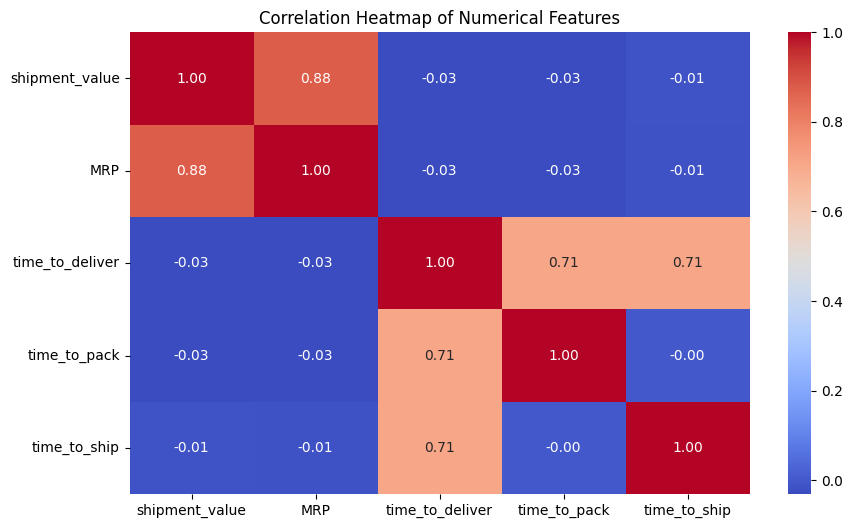

In [ ]:
correlation_matrix = df[['shipment_value', 'MRP', 'time_to_deliver', 'time_to_pack', 'time_to_ship']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

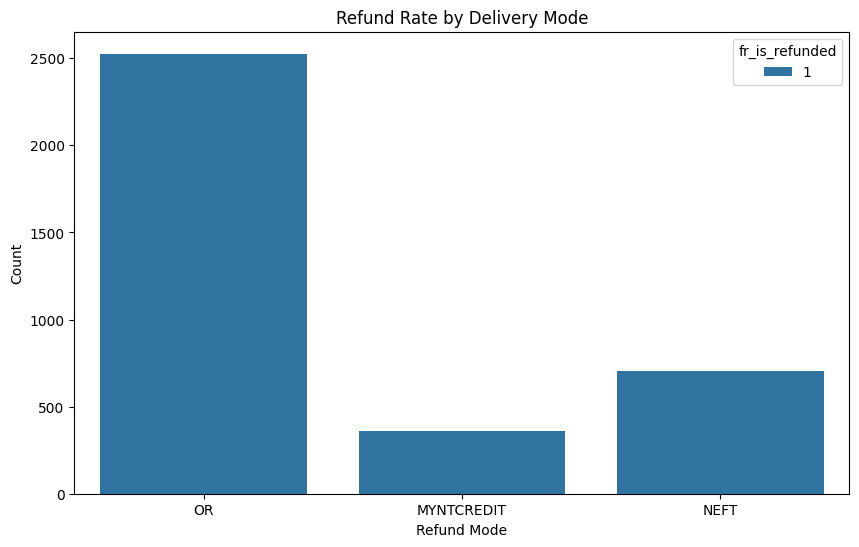

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='refund_mode', hue='fr_is_refunded', data=df)
plt.title('Refund Rate by Delivery Mode')
plt.xlabel('Refund Mode')
plt.ylabel('Count')
plt.show()


In [ ]:
df[df['fr_is_refunded'] == 1]['shipment_value'].sum()

np.int64(4086548)

In [ ]:
# Unique values in item and order identifiers
identifiers = ['packet_id', 'item_id', 'sku_id', 'core_item_id']
for id in identifiers:
    print(f'{id} has {df[id].nunique()} unique values')

packet_id has 3369 unique values
item_id has 3591 unique values
sku_id has 1524 unique values
core_item_id has 0 unique values


In [ ]:
# Status counts
print(df['order_status'].value_counts())
print(df['item_status'].value_counts())

# Shipping status
print(df[['is_shipped', 'is_realised', 'is_delivered']].apply(pd.value_counts))

order_status
C    3593
Name: count, dtype: int64
item_status
C    3593
Name: count, dtype: int64
   is_shipped  is_realised  is_delivered
0         NaN            1           NaN
1      3593.0         3592        3593.0


<ipython-input-15-92fb4885a232>:6: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  print(df[['is_shipped', 'is_realised', 'is_delivered']].apply(pd.value_counts))


return_status
DLS    2577
RL      947
LPI      63
RRC       6
Name: count, dtype: int64
Total refund amount: 4021574


<ipython-input-16-06022340b420>:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('fr_refunded_date')['fr_refund_amount'].resample('M').sum().plot()
/usr/local/lib/python3.11/dist-packages/pandas/plotting/_matplotlib/core.py:1561: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(left, right)


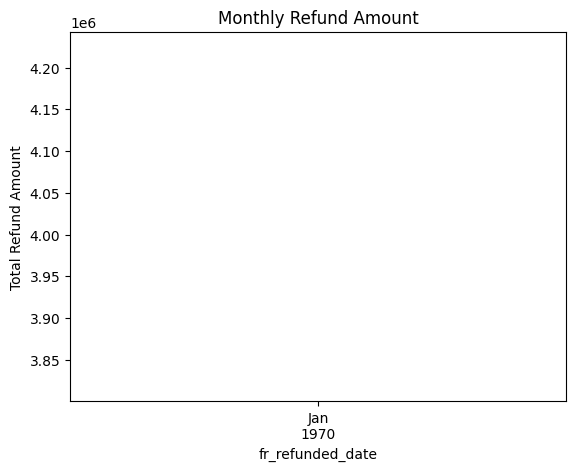

In [ ]:
# Returns and refunds
print(df['return_status'].value_counts())
print("Total refund amount:", df['fr_refund_amount'].sum())

# Plot refunds over time
df['fr_refunded_date'] = pd.to_datetime(df['fr_refunded_date'])
df.set_index('fr_refunded_date')['fr_refund_amount'].resample('M').sum().plot()
plt.title('Monthly Refund Amount')
plt.ylabel('Total Refund Amount')
plt.show()

payment_method
on     2611
cod     982
Name: count, dtype: int64


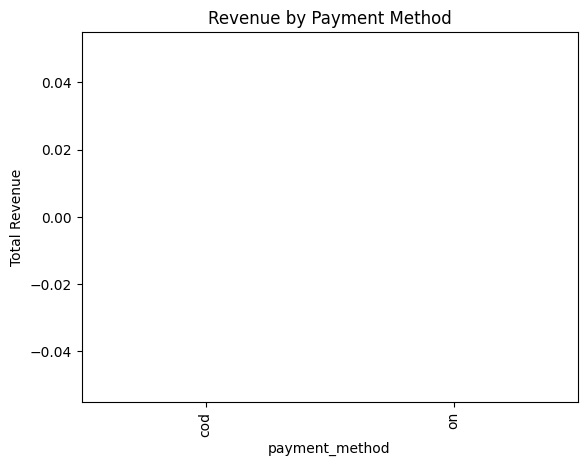

In [ ]:
# Payment method distribution
print(df['payment_method'].value_counts())

# Revenue by payment method
df.groupby('payment_method')['Net_Amount'].sum().plot(kind='bar')
plt.title('Revenue by Payment Method')
plt.ylabel('Total Revenue')
plt.show()

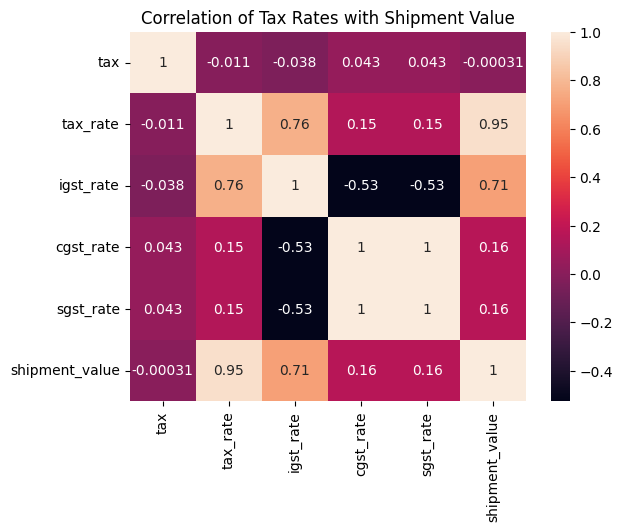

In [ ]:
# Tax rates and amounts
tax_cols = ['tax', 'tax_rate', 'igst_rate', 'cgst_rate', 'sgst_rate']
df[tax_cols].describe()

# Correlation of tax rates with shipment value
sns.heatmap(df[tax_cols + ['shipment_value']].corr(), annot=True)
plt.title('Correlation of Tax Rates with Shipment Value')
plt.show()

Delivery_State
MAHARASHTRA          527
KARNATAKA            519
UTTAR PRADESH        450
DELHI                377
HARYANA              343
WEST BENGAL          193
GUJARAT              172
TELANGANA            147
TAMILNADU            107
MADHYA PRADESH       101
RAJASTHAN             86
PUNJAB                84
ODISHA                63
UTTARAKHAND           61
ASSAM                 57
KERALA                52
BIHAR                 49
JHARKHAND             36
CHHATISHGARH          32
ANDHRA PRADESH        32
HIMACHAL PRADESH      26
GOA                   26
CHANDIGARH            19
JAMMU AND KASHMIR     16
MEGHALAYA              5
MANIPUR                4
ARUNACHAL PRADESH      3
MIZORAM                2
NAGALAND               2
SIKKIM                 1
PONDICHERRY            1
Name: count, dtype: int64


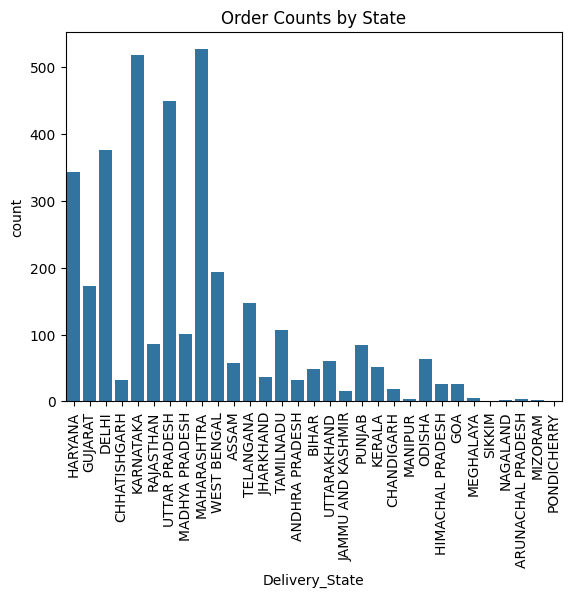

In [ ]:
# Analysis by state
print(df['Delivery_State'].value_counts())

# Plot distribution of orders by state
sns.countplot(data=df, x='Delivery_State')
plt.title('Order Counts by State')
plt.xticks(rotation=90)
plt.show()

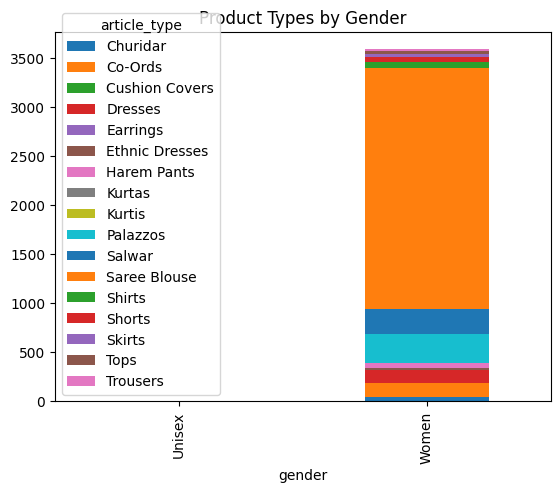

In [ ]:
# Analysis by gender and article type
pd.crosstab(df['gender'], df['article_type']).plot(kind='bar', stacked=True)
plt.title('Product Types by Gender')
plt.show()

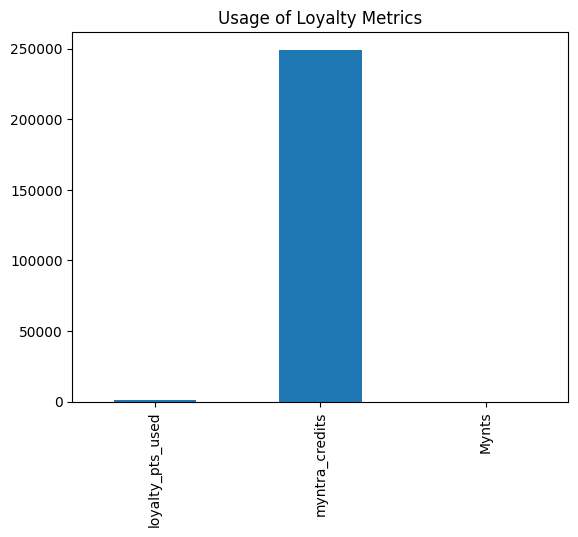

In [ ]:
# Customer loyalty analysis
loyalty_metrics = ['loyalty_pts_used', 'myntra_credits', 'Mynts']
df[loyalty_metrics].sum().plot(kind='bar')
plt.title('Usage of Loyalty Metrics')
plt.show()

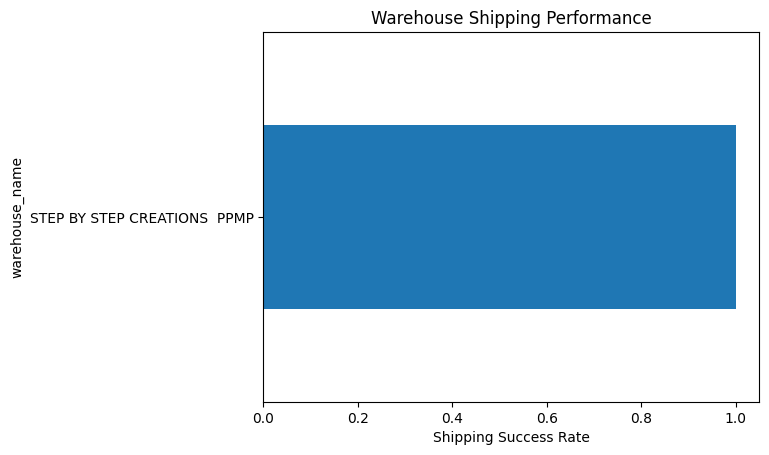

In [ ]:
# Warehouse shipping performance
df.groupby('warehouse_name')['is_shipped'].mean().sort_values().plot(kind='barh')
plt.title('Warehouse Shipping Performance')
plt.xlabel('Shipping Success Rate')
plt.show()